# Limpieza del texto

In [1]:
# Importamos las librerias
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

from matplotlib import pyplot as plt
from scipy.cluster import hierarchy
import string

In [2]:
data=pd.read_csv('../Data/BD_Comercio_Exterior_2020.csv')
data.head(20)

D:\Paola\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,clave_aduana,fraccion,subdivision,descripcion,precio_unitario,cantidad_mercancia,unidad_medida,clave_tarifa,valor_agregado,pais_origen_destino,tipo_cambio,total_fletes,total_seguros,total_embalajes,total_incrementales,total_deducibles,month,year
0,0,200,60063202,NaN,TEJIDOS DE FIBRAS SINTETICAS 100% POLIESTER (T...,37.26148,9787.4,1,1,0.0,CHN,19.6113,0.0,0.0,0.0,0.0,0.0,1,2020
1,1,200,60063102,NaN,TEJIDOS DE FIBRAS SINTETICAS 100% POLIESTER(BL...,31.96652,5824.5,1,1,0.0,CHN,19.6113,0.0,0.0,0.0,0.0,0.0,1,2020
2,2,70,61178099,NaN,MANOPLAS DE KEVLAR/PIEL ID#:MX4KEV,92.47917,96.0,6,6,0.0,USA,18.8727,0.0,0.0,0.0,11324.0,0.0,1,2020
3,3,70,61143099,NaN,BATAS DE 100% POLIESTER ID#:3470-L,554.40000,5.0,6,6,0.0,SLV,18.8727,0.0,0.0,0.0,11324.0,0.0,1,2020
4,4,70,61143099,NaN,BATAS DE 100% POLIESTER ID#:3470-XL,554.33333,3.0,6,6,0.0,SLV,18.8727,0.0,0.0,0.0,11324.0,0.0,1,2020
5,5,70,61178099,NaN,MANGAS 100% ALGODON ID#:AXFR183ST,28.12083,240.0,6,6,0.0,USA,18.8727,0.0,0.0,0.0,11324.0,0.0,1,2020
6,6,70,61178099,NaN,MANGAS 100:ALGODON ID#:MXKEV18TSVEL,46.61458,96.0,6,6,0.0,USA,18.8727,0.0,0.0,0.0,11324.0,0.0,1,2020
7,7,70,61169201,NaN,GUANTES DE 60% ALDOGON 40% POLIESTER MARCA:MAG...,5.37867,4500.0,9,9,0.0,PHL,18.8727,0.0,0.0,0.0,11324.0,0.0,1,2020
8,8,70,61178099,NaN,"MANGAS 100% ALGODON MODELO:MXKEV18, ID...",31.89583,240.0,6,6,0.0,USA,18.8727,0.0,0.0,0.0,11324.0,0.0,1,2020
9,9,70,62101001,NaN,OVEROLES 100% POLIPROPILENO MODELO:APCVCH...,16.79600,500.0,6,6,0.0,CHN,18.8727,0.0,0.0,0.0,11324.0,0.0,1,2020


In [3]:
palabras=data['descripcion']
palabras

0          TEJIDOS DE FIBRAS SINTETICAS 100% POLIESTER (T...
1          TEJIDOS DE FIBRAS SINTETICAS 100% POLIESTER(BL...
2                       MANOPLAS DE KEVLAR/PIEL   ID#:MX4KEV
3                       BATAS DE 100% POLIESTER   ID#:3470-L
4                     BATAS DE 100% POLIESTER    ID#:3470-XL
                                 ...                        
1021077            CUERDA 100% POLYESTER RIGIDA Y RECUBIERTA
1021078                            HILADOS 100% DE POLIESTER
1021079                   HILO DE FIBRA CORTA 100% POLIESTER
1021080           TEJIDO DE PUNTO 92% POLIESTER, 8% ELASTANO
1021081                                    HILO DE POLIESTER
Name: descripcion, Length: 1021082, dtype: object

### Buscadorcito 

In [4]:
# buscador rapido
str_match = [s for s in palabras if s.__contains__("BATA")]
#print(str_match)
len(str_match)

4946

In [5]:
str_match

['BATAS DE 100% POLIESTER   ID#:3470-L',
 'BATAS DE 100% POLIESTER    ID#:3470-XL',
 'BATAS DE 100% POLIESTER     ID#:3470-M',
 'BATAS DE POLIESTER    ID#:3470-XXL',
 'BATA ANTIESTATICA',
 'BATA PARA DAMA DE SINTETICO',
 'BATAS DE LABORATORIO DE TELA MICROPOROSA TALLA GRANDE',
 'BATAS DE LABORATORIO DE TELA MICROPOROSA TALLA MEDIANA',
 'BATAS DE LABORATORIO DE TELA MICROPOROSA TALLA EXTRA GRANDE',
 'BATA DE CIRUGIA (TELA SIN TEJER)',
 'BATA DE CIRUGIA (TELA SIN TEJER)',
 'CORBATA',
 'CORBATA',
 'BATA DE POLIESTER',
 'BATA DE POLIESTER',
 'BATA DE POLIESTER',
 'BATAS CJAS DE 100 Y 80 PZAS C/U, SABANAS CJAS DE 100,25 PZAS C/U,ESTONIQUETE CJAS DE 160 Y 200 PZAS C/U, QUIRURGICO DESECHABLE',
 'BATA',
 'BATAS DE TRABAJO DE TEJIDO PLANO (NO PUNTO)99.51% POLIESTER 0.49% FIBRAS CONDUCTIVAS DE MANGA LARGA UNISEX TALLA XL (EXTRA GRANDE)',
 'BATAS DE TRABAJO DE TEJIDO PLANO (NO PUNTO)99.51% POLIESTER 0.49% FIBRAS CONDUCTIVAS DE MANGA LARGA UNISEX TALLA S (CHICA)',
 'BATAS DE TRABAJO DE TEJIDO PLAN

In [6]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pgome\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
stop_words_sp = set(stopwords.words('spanish'))

In [8]:
wordcloud = WordCloud(background_color='white',
        stopwords=stop_words_sp,
        max_words=40,
        max_font_size=50, 
        scale=3,
        random_state=3).generate(str(str_match))

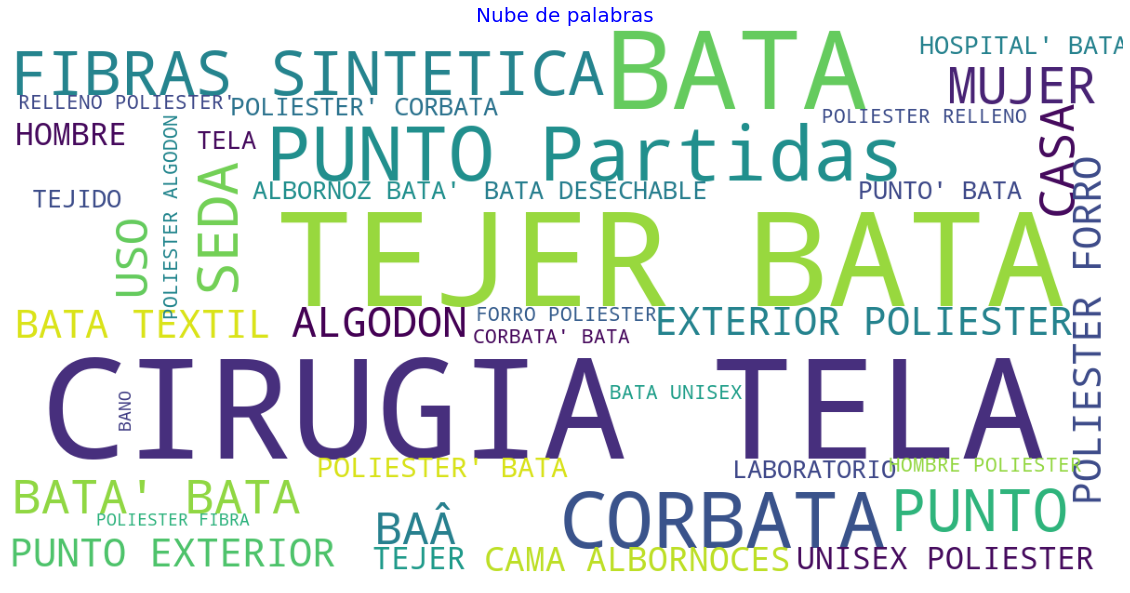

In [9]:
wordcloud.recolor(random_state=1)
plt.figure(figsize=(20, 15))
plt.title('Nube de palabras', fontsize=20,color='blue')
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Creacion del wordcloud

In [10]:
wordcloud = WordCloud(background_color='white',
        stopwords=stop_words_sp,
        max_words=40,
        max_font_size=50, 
        scale=3,
        random_state=3).generate(str(data['descripcion']))

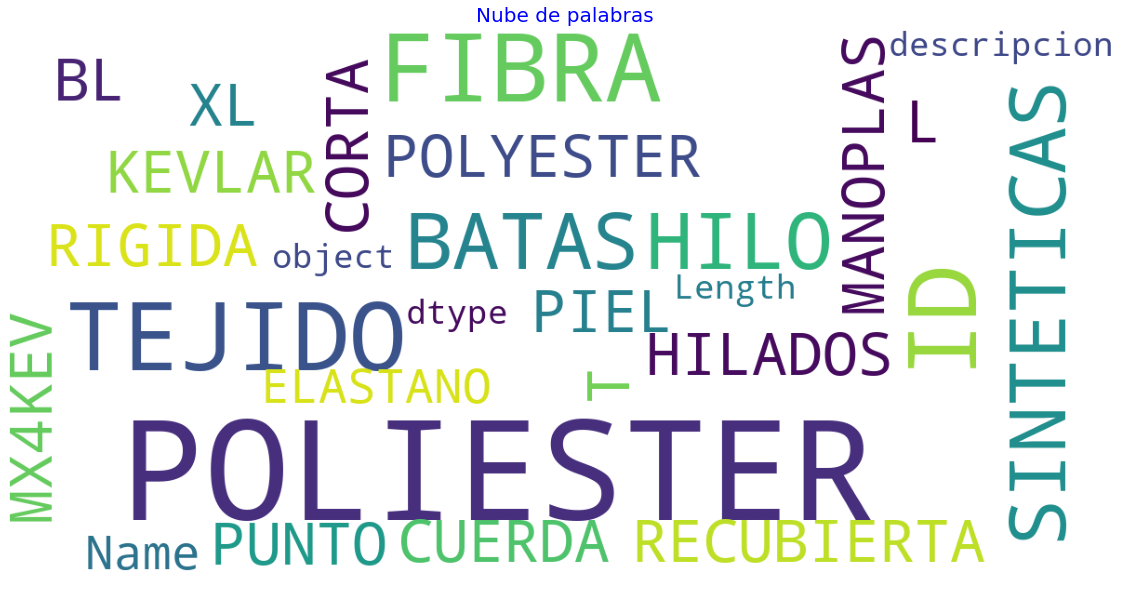

In [11]:
wordcloud.recolor(random_state=1)
plt.figure(figsize=(20, 15))
plt.title('Nube de palabras', fontsize=20,color='blue')
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Accesorios para cabello
Bata
Bermudas
Bolsa
Brasier
Bufanda
Calcetines
Calzón



In [12]:
tiposPrenda= {
    "ACCESORIO PARA CABELLO": "Accesorios para cabello",
    "ACCESORIOS PARA CABELLO": "Accesorios para cabello",
    "BALERINA": "Accesorios para cabello",
    "BALERINAS": "Accesorios para cabello",
    "BANDA": "Accesorios para cabello",
    "BANDA": "Accesorios para cabello",
    "BANDANA": "Accesorios para cabello",
    "BANDANAS": "Accesorios para cabello",
    "BANDAS": "Accesorios para cabello",
    "BANDAS": "Accesorios para cabello",
    "BROCHE DE CABELLO": "Accesorios para cabello",
    "BROCHE DE PELO": "Accesorios para cabello",
    "BROCHE PARA EL CABELLO": "Accesorios para cabello",
    "BROCHE PARA EL PELO": "Accesorios para cabello",
    "CABELLO": "Accesorios para cabello",
    "CLIP DE CABELLO": "Accesorios para cabello",
    "CLIP DE PELO": "Accesorios para cabello",
    "DIADEMA": "Accesorios para cabello",
    "DIADEMAS": "Accesorios para cabello",
    "HORQUILLA": "Accesorios para cabello",
    "HORQUILLAS": "Accesorios para cabello",
    "LAZO": "Accesorios para cabello",
    "LAZOS": "Accesorios para cabello",
    "LIGA": "Accesorios para cabello",
    "LIGAS": "Accesorios para cabello",
    "PASADOR": "Accesorios para cabello",
    "PASADORES": "Accesorios para cabello",
    "PELO": "Accesorios para cabello",
    "PINZA DE CABELLO": "Accesorios para cabello",
    "PINZA DE PELO": "Accesorios para cabello",
    "PINZAS DE CABELLO": "Accesorios para cabello",
    "PINZAS DE PELO": "Accesorios para cabello",
    "SCRUNCHIE": "Accesorios para cabello",
    "SCRUNCHIES": "Accesorios para cabello",
    "TURBANTE": "Accesorios para cabello",
    "TURBANTES": "Accesorios para cabello",
    "VALERINA": "Accesorios para cabello",
    "VALERINAS": "Accesorios para cabello",
    
    
    "BATA":"Bata",
    "BATAS":"Bata",
    
    
    "BERMUDA":"Bermudas",
    "BERMUDAS":"Bermudas",
    "CAPRI":"Bermudas",
    "CAPRIS":"Bermudas",
    "JOGGER":"Bermudas",
    "JOGGERS":"Bermudas",
    "PANTALON CORTO":"Bermudas",
    "PANTALONES CORTOS":"Bermudas",
    "SHORT":"Bermudas",
    "SHORTS":"Bermudas",

    
    
    "BANDOLERA":"Bolsa",
    "BOLSA":"Bolsa",
    "BOLSAS":"Bolsa",
    "BOLSITA":"Bolsa",
    "BOLSITAS":"Bolsa",
    "BOLSO":"Bolsa",
    "CARTERA":"Bolsa",
    "CARTERAS":"Bolsa",
    "MALETA":"Bolsa",
    "MALETAS":"Bolsa",
    "MALETIN":"Bolsa",
    "MALETINES":"Bolsa",
    "MORRAL":"Bolsa",
    "PORTAFOLIO":"Bolsa",
    "PORTAFOLIOS":"Bolsa",
    "TOTE":"Bolsa",
    "ZURRON":"Bolsa",
    
    
    "BRACIER":"Brasier",
    "BRASIER":"Brasier",
    "BRASIERE":"Brasier",
    "BRASSIER":"Brasier",
    "BRASSIERE":"Brasier",
    "CORPIÃ\x91O":"Brasier",
    "CORPIÃ\x91OS":"Brasier",
    "CORPIÂ¥O":"Brasier",
    "CORPIÂ¥OS":"Brasier",
    "CORPINO":"Brasier",
    "CORPINOS":"Brasier",
    "SOSTEN":"Brasier",
    "SOSTENES":"Brasier",
    "SUJETADOR":"Brasier",
    "SUJETADORES":"Brasier",

    
    
    "BUFANDA":"Bufanda",
    "BUFANDAS":"Bufanda",
    "CHAL":"Bufanda",
    "CHALES":"Bufanda",
    "CHALINA":"Bufanda",
    "CHALINAS":"Bufanda",
    "MASCADA":"Bufanda",
    "MASCADAS":"Bufanda",
    "PAÂ¥UELO":"Bufanda",
    "PAÂ¥UELOS":"Bufanda",
    "PALIACATE":"Bufanda",
    "PALIACATES":"Bufanda",

    
    
    
    "CALCETA":"Calcetines",
    "CALCETAS":"Calcetines",
    "CALCETERIA":"Calcetines",
    "CALCETIN":"Calcetines",
    "CALCETINES":"Calcetines",
    "CALSETA":"Calcetines",
    "CALSETAS":"Calcetines",
    "CALSETIN":"Calcetines",
    "CALSETINES":"Calcetines",
    "CALZETA":"Calcetines",
    "CALZETAS":"Calcetines",
    "CALZETIN":"Calcetines",
    "CALZETINES":"Calcetines",

    
    
    "CALZONCILLOS":"Calzon",
    "CALZONCILLO":"Calzon",
    "CALZON":"Calzon",
    "CALZONES":"Calzon",
    "BRAGA":"Calzon",
    "BRAGAS":"Calzon",
    "BOXER":"Calzon",
    "BOXERS":"Calzon",
    "CALZONSILLO":"Calzon",
    "CALZONSILLOS":"Calzon",
    "TANGA":"Calzon",
    "TANGAS":"Calzon",




}

In [13]:
#pd.set_option("display.max_rows", None, "display.max_columns", None)

#desc_unique=pd.DataFrame(data.descripcion.value_counts())

#desc_unique

In [14]:
new_data=data
new_data

,Unnamed: 0,clave_aduana,fraccion,subdivision,descripcion,precio_unitario,cantidad_mercancia,unidad_medida,clave_tarifa,valor_agregado,pais_origen_destino,tipo_cambio,total_fletes,total_seguros,total_embalajes,total_incrementales,total_deducibles,month,year
0,0,200,60063202,NaN,TEJIDOS DE FIBRAS SINTETICAS 100% POLIESTER (T...,37.26148,9787.4,1,1,0.0,CHN,19.6113,0.0,0.0,0.0,0.0,0.0,1,2020
1,1,200,60063102,NaN,TEJIDOS DE FIBRAS SINTETICAS 100% POLIESTER(BL...,31.96652,5824.5,1,1,0.0,CHN,19.6113,0.0,0.0,0.0,0.0,0.0,1,2020
2,2,70,61178099,NaN,MANOPLAS DE KEVLAR/PIEL ID#:MX4KEV,92.47917,96.0,6,6,0.0,USA,18.8727,0.0,0.0,0.0,11324.0,0.0,1,2020
3,3,70,61143099,NaN,BATAS DE 100% POLIESTER ID#:3470-L,554.40000,5.0,6,6,0.0,SLV,18.8727,0.0,0.0,0.0,11324.0,0.0,1,2020
4,4,70,61143099,NaN,BATAS DE 100% POLIESTER ID#:3470-XL,554.33333,3.0,6,6,0.0,SLV,18.8727,0.0,0.0,0.0,11324.0,0.0,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021077,84276,160,56075001,0,CUERDA 100% POLYESTER RIGIDA Y RECUBIERTA,169.14703,2079.8,1,1,0.0,CHN,20.7628,0.0,33.0,0.0,0.0,0.0,11,2021
1021078,84277,160,54023301,0,HILADOS 100% DE POLIESTER,51.98874,19800.0,1,1,0.0,CHN,20.9632,0.0,0.0,0.0,0.0,0.0,11,2021
1021079,84278,160,55092101,0,HILO DE FIBRA CORTA 100% POLIESTER,40.07591,19958.4,1,1,0.0,IDN,21.5462,255861.0,2551.0,0.0,4956.0,0.0,11,2021
1021080,84279,160,60041099,2,"TEJIDO DE PUNTO 92% POLIESTER, 8% ELASTANO",70.29055,23497.0,1,1,0.0,CHN,21.5462,241102.0,5043.0,0.0,0.0,0.0,11,2021


## Accesorios para pelo

"ACCESORIO PARA CABELLO": "Accesorios para cabello",
    "ACCESORIOS PARA CABELLO": "Accesorios para cabello",
    "BALERINA": "Accesorios para cabello",
    "BALERINAS": "Accesorios para cabello",
    "BANDA": "Accesorios para cabello",
    "BANDA": "Accesorios para cabello",
    "BANDANA": "Accesorios para cabello",
    "BANDANAS": "Accesorios para cabello",
    "BANDAS": "Accesorios para cabello",
    "BANDAS": "Accesorios para cabello",
    "BROCHE DE CABELLO": "Accesorios para cabello",
    "BROCHE DE PELO": "Accesorios para cabello",
    "BROCHE PARA EL CABELLO": "Accesorios para cabello",
    "BROCHE PARA EL PELO": "Accesorios para cabello",
    "CABELLO": "Accesorios para cabello",
    "CLIP DE CABELLO": "Accesorios para cabello",
    "CLIP DE PELO": "Accesorios para cabello",
    "DIADEMA": "Accesorios para cabello",
    "DIADEMAS": "Accesorios para cabello",
    "HORQUILLA": "Accesorios para cabello",
    "HORQUILLAS": "Accesorios para cabello",
    "LAZO": "Accesorios para cabello",
    "LAZOS": "Accesorios para cabello",
    "LIGA": "Accesorios para cabello",
    "LIGAS": "Accesorios para cabello",
    "PASADOR": "Accesorios para cabello",
    "PASADORES": "Accesorios para cabello",
    "PELO": "Accesorios para cabello",
    "PINZA DE CABELLO": "Accesorios para cabello",
    "PINZA DE PELO": "Accesorios para cabello",
    "PINZAS DE CABELLO": "Accesorios para cabello",
    "PINZAS DE PELO": "Accesorios para cabello",
    "SCRUNCHIE": "Accesorios para cabello",
    "SCRUNCHIES": "Accesorios para cabello",
    "TURBANTE": "Accesorios para cabello",
    "TURBANTES": "Accesorios para cabello",
    "VALERINA": "Accesorios para cabello",
    "VALERINAS": "Accesorios para cabello",

In [15]:
word_indx = list(data[(data['descripcion'].str.contains('ACCESORIO PARA CABELLO|ACCESORIOS PARA CABELLO|BALERINA|BANDA|CABELLO|PELO|DIADEMA|HORQUILLA|LAZO|LIGA|PASADOR|SCRUNCHI|TURBANTE|VALERINA'))].index)
len(word_indx)

10000

In [16]:
data[['descripcion']].iloc[word_indx]

,descripcion
58,DONA PARA LA SUJECCION DEL CABELLO
76,COLETERO PARA EL CABELLO
248,TELA SINTETICA DE TERCIOPELO POR TRAMA CORTADO...
303,BANDA DE TEXTIL
305,BANDAS TRANSPORTADORAS DE TEXTIL
...,...
1020834,LIGAS PARA EL CABELLO
1020842,LIGAS PARA EL CABELLO
1020919,LAS DEMAS CINTAS DE TERCIOPELO DE FELPA
1020961,TEJIDOS DE PUNTO DE FILAMENTOS SINTETICOS (TER...


In [17]:
new_data['Artículo'] = ''

In [18]:
new_data['Artículo'].iloc[word_indx] = "Accesorios para cabello"

D:\Paola\Anaconda\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


## Bata

In [19]:
word_indx2 = list(data[(data['descripcion'].str.startswith('BATA'))].index)
len(word_indx2)

3677

In [20]:
data[['descripcion']].iloc[word_indx2]

,descripcion
3,BATAS DE 100% POLIESTER ID#:3470-L
4,BATAS DE 100% POLIESTER ID#:3470-XL
23,BATAS DE 100% POLIESTER ID#:3470-M
24,BATAS DE POLIESTER ID#:3470-XXL
519,BATA ANTIESTATICA
...,...
1019712,"BATA, 65% POLIESTER Y 35% ALGODÃ N, No 7102A"
1019732,"BATA, 65% POLIESTER Y 35% ALGODÃ N, No 7106A"
1019779,"BATA, 65% POLIESTER Y 35% ALGODÃ N, No 7402A"
1019802,BATA DE POLIESTER PARA REPARACION


In [21]:
new_data['Artículo'].iloc[word_indx2] = "Bata"

## Bermuda

    "BERMUDA":"Bermudas",
    "BERMUDAS":"Bermudas",
    "CAPRI":"Bermudas",
    "CAPRIS":"Bermudas",
    "JOGGER":"Bermudas",
    "JOGGERS":"Bermudas",
    "PANTALON CORTO":"Bermudas",
    "PANTALONES CORTOS":"Bermudas",
    "SHORT":"Bermudas",
    "SHORTS":"Bermudas",


In [22]:
word_indx3 = list(data[(data['descripcion'].str.contains('BERMUDA|CAPRI|JOGGER|PANTALON CORTO|PANTALONES CORTOS|SHORT'))].index)
len(word_indx3)

57691

In [23]:
data[['descripcion']].iloc[word_indx3]

,descripcion
103,BERMUDA PARA NINO. 100% ALGODON. TEJIDO DE PUNTO
118,BERMUDA PARA NINO. 99% ALGODON 1% ELASTANO. TE...
171,BERMUDA PARA SENORA. 100% VISCOSA. TEJIDO EN U...
213,PANTALONES CORTOS PARA MUJER DE FIBRAS SINTETI...
389,PANTALONES CORTOS PARA MUJER DE ALGODON NO DE ...
...,...
1020633,SHORT
1020634,SHORT
1020635,SHORT
1020830,SHORT CENIDO EN LA CINTURA POR UNA BANDA ELAST...


In [24]:
new_data['Artículo'].iloc[word_indx3] = "Bermudas"

## Bolsa

 "BANDOLERA":"Bolsa",
    "BOLSA":"Bolsa",
    "BOLSAS":"Bolsa",
    "BOLSITA":"Bolsa",
    "BOLSITAS":"Bolsa",
    "BOLSO":"Bolsa",
    "CARTERA":"Bolsa",
    "CARTERAS":"Bolsa",
    "MALETA":"Bolsa",
    "MALETAS":"Bolsa",
    "MALETIN":"Bolsa",
    "MALETINES":"Bolsa",
    "MORRAL":"Bolsa",
    "PORTAFOLIO":"Bolsa",
    "PORTAFOLIOS":"Bolsa",
    "TOTE":"Bolsa",
    "ZURRON":"Bolsa",

In [25]:
word_indx4 = list(data[(data['descripcion'].str.contains('BANDOLERA|BOLSA|BOLSITA|BOLSO|CARTERA|MALET|MORRAL|PORTAFOL|TOTE|ZURRON'))].index)
len(word_indx4)

3711

In [26]:
data[['descripcion']].iloc[word_indx4]

,descripcion
321,BOLSA FILTRANTE DE NAYLON (M1360138-1T-0001)
405,"BANDOLERAS DE MATERIA TEXTIL,BANDOLRES DE MATE..."
574,ARTICULOS DE MATERIAL TEXTIL PARA USO TECNICO ...
1168,BOLSA TEXTIL
1725,CHAQUETAS PARA HOMBRE TALLA 54 DE 54 PULGADAS ...
...,...
1018221,BOLSA DE LAVADO
1019260,CONFECCION TIPO BOLSA DE TELAS SIN TEJER
1020845,BOLSAS DE NYLON PARA EMPAQUE
1020951,CINTURON DE TRABAJO CON BOLSAS PORTAHERRAMIENTAS


In [27]:
new_data['Artículo'].iloc[word_indx4] = "Bolsa"

## Brasier

"BRACIER":"Brasier",
    "BRASIER":"Brasier",
    "BRASIERE":"Brasier",
    "BRASSIER":"Brasier",
    "BRASSIERE":"Brasier",
    "CORPIÃ\x91O":"Brasier",
    "CORPIÃ\x91OS":"Brasier",
    "CORPIÂ¥O":"Brasier",
    "CORPIÂ¥OS":"Brasier",
    "CORPINO":"Brasier",
    "CORPINOS":"Brasier",
    "SOSTEN":"Brasier",
    "SOSTENES":"Brasier",
    "SUJETADOR":"Brasier",
    "SUJETADORES":"Brasier",

In [28]:
word_indx5 = list(data[(data['descripcion'].str.contains('BRACI|BRASI|BRASSI|CORPI|SOSTEN|SUJETADOR'))].index)
len(word_indx5)

15032

In [29]:
data[['descripcion']].iloc[word_indx5]

,descripcion
277,"PARTE PARA BRASSIER (20,000.00 PZAS) COPAS PRE..."
302,SUJETADOR TEXTIL
365,SOSTENES Partidas: 13
370,SOSTENES Partidas: 11
373,SOSTENES Partidas: 12
...,...
1020871,SOSTEN PARA MUJER
1020872,SOSTEN PARA MUJER
1020904,JUEGO DE DOS CORTINAS CON SUJETADORES 100% POL...
1020905,JUEGO DE DOS CORTINAS CON SUJETADORES 100% POL...


In [30]:
new_data['Artículo'].iloc[word_indx5] = "Brasier"

## Bufanda

    "BUFANDA":"Bufanda",
    "BUFANDAS":"Bufanda",
    "CHAL":"Bufanda",
    "CHALES":"Bufanda",
    "CHALINA":"Bufanda",
    "CHALINAS":"Bufanda",
    "MASCADA":"Bufanda",
    "MASCADAS":"Bufanda",
    "PAÂ¥UELO":"Bufanda",
    "PAÂ¥UELOS":"Bufanda",
    "PALIACATE":"Bufanda",
    "PALIACATES":"Bufanda",

In [31]:
word_indx6 = list(data[(data['descripcion'].str.contains('BUFANDA|CHAL|MASCADA|PAÂ¥UELO|PALIACATE'))].index)
len(word_indx6)

8718

In [32]:
data[['descripcion']].iloc[word_indx6]

,descripcion
122,BUFANDA PARA SENORA. 85% ACRILICO 15% POLIESTE...
136,CHALECO PARA SENORA. 100% NAILON. TEJIDO EN UR...
376,"CHALINAS DE SEDA NO DE PUNTO Partidas: 13,14"
385,"BUFANDAS DE LANA NO DE PUNTO Partidas: 14,15,34"
388,"CHALINAS DE LANA NO DE PUNTO Partidas: 112,113..."
...,...
1020771,CHALECO PARA BEBE
1020773,CHALECO PARA NIÂ¥O
1020776,CHALECO PARA NIÂ¥O
1020777,CHALECO PARA BEBE


In [33]:
new_data['Artículo'].iloc[word_indx6] = "Bufanda"

## Calcetines

"CALCETA":"Calcetines",
    "CALCETAS":"Calcetines",
    "CALCETERIA":"Calcetines",
    "CALCETIN":"Calcetines",
    "CALCETINES":"Calcetines",
    "CALSETA":"Calcetines",
    "CALSETAS":"Calcetines",
    "CALSETIN":"Calcetines",
    "CALSETINES":"Calcetines",
    "CALZETA":"Calcetines",
    "CALZETAS":"Calcetines",
    "CALZETIN":"Calcetines",
    "CALZETINES":"Calcetines",


In [34]:
word_indx7 = list(data[(data['descripcion'].str.contains('CALCET|CALSET|CALZET'))].index)
len(word_indx7)

21296

In [35]:
data[['descripcion']].iloc[word_indx7]

,descripcion
90,CALCETINES
91,CALCETINES
92,CALCETINES
93,CALCETINES
94,CALCETINES
...,...
1020880,CALCETINES (3 PARES) PARA MUJER (DE PUNTO) 100...
1020881,CALCETINES (3 PARES) PARA MUJER (DE PUNTO) 100...
1020882,CALCETINES (3 PARES) PARA MUJER (DE PUNTO) 100...
1020883,CALCETINES (6 PARES) PARA NINA (DE PUNTO) 75% ...


In [36]:
new_data['Artículo'].iloc[word_indx7] = "Calcetines"

## Calzon

    "CALZONCILLOS":"Calzon",
    "CALZONCILLO":"Calzon",
    "CALZON":"Calzon",
    "CALZONES":"Calzon",
    "BRAGA":"Calzon",
    "BRAGAS":"Calzon",
    "BOXER":"Calzon",
    "BOXERS":"Calzon",
    "CALZONSILLO":"Calzon",
    "CALZONSILLOS":"Calzon",
    "TANGA":"Calzon",
    "TANGAS":"Calzon",

In [37]:
word_indx8 = list(data[(data['descripcion'].str.contains('CALZON|BRAGA|BOXER|TANGA'))].index)
len(word_indx8)

16000

In [38]:
data[['descripcion']].iloc[word_indx8]

,descripcion
71,BRAGA PARA CABALLERO. 77% ALGODON 16% POLIESTE...
440,JUEGO DE CALZONCILLOS PARA HOMBRE DE ALGODON D...
1319,CALZONCILLOS
2190,CALZON PARA MUJER (DE PUNTO) 95% POLIESTER 5% ...
2193,FAJA CALZON PARA MUJER (DE PUNTO) 85% POLIAMID...
...,...
1019878,CALZONES (3 PIEZAS) PARA MUJER (DE PUNTO) EXTE...
1019879,CALZON PARA MUJER (DE PUNTO) EXTERIOR 90% POLI...
1019880,CALZONES (3 PIEZAS) PARA MUJER (DE PUNTO) EXTE...
1019929,CALZON PARA MUJER (DE PUNTO) EXTERIOR 90% POLI...


In [39]:
new_data['Artículo'].iloc[word_indx8] = "Calzon"

In [40]:
new_data

,Unnamed: 0,clave_aduana,fraccion,subdivision,descripcion,precio_unitario,cantidad_mercancia,unidad_medida,clave_tarifa,valor_agregado,pais_origen_destino,tipo_cambio,total_fletes,total_seguros,total_embalajes,total_incrementales,total_deducibles,month,year,Artículo
0,0,200,60063202,NaN,TEJIDOS DE FIBRAS SINTETICAS 100% POLIESTER (T...,37.26148,9787.4,1,1,0.0,CHN,19.6113,0.0,0.0,0.0,0.0,0.0,1,2020,
1,1,200,60063102,NaN,TEJIDOS DE FIBRAS SINTETICAS 100% POLIESTER(BL...,31.96652,5824.5,1,1,0.0,CHN,19.6113,0.0,0.0,0.0,0.0,0.0,1,2020,
2,2,70,61178099,NaN,MANOPLAS DE KEVLAR/PIEL ID#:MX4KEV,92.47917,96.0,6,6,0.0,USA,18.8727,0.0,0.0,0.0,11324.0,0.0,1,2020,
3,3,70,61143099,NaN,BATAS DE 100% POLIESTER ID#:3470-L,554.40000,5.0,6,6,0.0,SLV,18.8727,0.0,0.0,0.0,11324.0,0.0,1,2020,Bata
4,4,70,61143099,NaN,BATAS DE 100% POLIESTER ID#:3470-XL,554.33333,3.0,6,6,0.0,SLV,18.8727,0.0,0.0,0.0,11324.0,0.0,1,2020,Bata
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021077,84276,160,56075001,0,CUERDA 100% POLYESTER RIGIDA Y RECUBIERTA,169.14703,2079.8,1,1,0.0,CHN,20.7628,0.0,33.0,0.0,0.0,0.0,11,2021,
1021078,84277,160,54023301,0,HILADOS 100% DE POLIESTER,51.98874,19800.0,1,1,0.0,CHN,20.9632,0.0,0.0,0.0,0.0,0.0,11,2021,
1021079,84278,160,55092101,0,HILO DE FIBRA CORTA 100% POLIESTER,40.07591,19958.4,1,1,0.0,IDN,21.5462,255861.0,2551.0,0.0,4956.0,0.0,11,2021,
1021080,84279,160,60041099,2,"TEJIDO DE PUNTO 92% POLIESTER, 8% ELASTANO",70.29055,23497.0,1,1,0.0,CHN,21.5462,241102.0,5043.0,0.0,0.0,0.0,11,2021,
